In [3]:
from pydataset import data
import seaborn as sns
import pandas as pd

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

In [4]:
# 4.)
# use a python module (pydata or seaborn datasets) containing datasets 
# as a source from the iris data. 
# Create a pandas dataframe, df_iris, from this data.

df_iris = data('iris')
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [6]:
df_iris.shape

(150, 5)

In [8]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [10]:
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [11]:
df_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [20]:
#5.)
# Read the Table1_CustDetails table from your spreadsheet exercises 
# google sheet into a dataframe named df_google_sheets.



sheet_url = 'https://docs.google.com/spreadsheets/d/19w21wz3gnjtHUwPX-hOZNf9sEIExmVT4rPlIk1Pqp50/edit#gid=1023018493'   

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_googlesheet = pd.read_csv(csv_export_url)
df_googlesheet.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,9.0
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,9.1
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,3.8
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,12.6
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,3.2


In [21]:
df_google_sheets_sample = df_googlesheet.head(100)

In [22]:
df_googlesheet.shape[0]

7049

In [23]:
df_googlesheet.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

In [25]:
df_googlesheet.select_dtypes(include='object')

,customer_id,gender,partner,dependents,payment_type,churn
0,0002-ORFBO,Female,Yes,Yes,Mailed check,No
1,0003-MKNFE,Male,No,No,Mailed check,No
2,0004-TLHLJ,Male,No,No,Electronic check,Yes
3,0011-IGKFF,Male,Yes,No,Electronic check,Yes
4,0013-EXCHZ,Female,Yes,No,Mailed check,Yes
...,...,...,...,...,...,...
7044,9987-LUTYD,Female,No,No,Mailed check,No
7045,9992-RRAMN,Male,Yes,No,Electronic check,Yes
7046,9992-UJOEL,Male,No,No,Mailed check,No
7047,9993-LHIEB,Male,Yes,Yes,Mailed check,No


In [27]:
df_googlesheet.describe()

,is_senior_citizen,phone_service,internet_service,contract_type,monthly_charges,total_charges,tenure
count,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7038.000000,7049.000000
mean,0.162009,1.324585,1.222585,0.690878,64.747014,2283.043883,32.380068
std,0.368485,0.642709,0.779068,0.833757,30.099460,2266.521984,24.594926
min,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,35.450000,401.587500,8.700000
50%,0.000000,1.000000,1.000000,0.000000,70.350000,1397.100000,28.700000
75%,0.000000,2.000000,2.000000,1.000000,89.850000,3793.775000,55.200000
max,1.000000,2.000000,2.000000,2.000000,118.750000,8684.800000,79.300000


In [26]:
telco_stats = df_googlesheet[['monthly_charges', 'total_charges']].describe().T
telco_stats

,count,mean,std,min,25%,50%,75%,max
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80


In [28]:
telco_stats['range'] = telco_stats['max'] - telco_stats['min']
telco_stats

,count,mean,std,min,25%,50%,75%,max,range
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75,100.5
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80,8666.0


In [ ]:
#6.)
#Download your spreadsheet exercises google sheet as an excel file 
# (File → Download → Microsoft Excel). 
# Read the Table1_CustDetails worksheet into a dataframe named df_excel.



In [29]:
df_excel = pd.read_excel('Kalpana_spreadsheet_exercises -BAM.xlsx', sheet_name='Table1_CustDetails')


In [30]:
df_excel_sample = df_excel.head(100)


In [31]:
df_excel.shape[0]


7049

In [32]:
df_excel.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

In [33]:
df_excel.select_dtypes(include='object')

,customer_id,gender,partner,dependents,payment_type,churn
0,0002-ORFBO,Female,Yes,Yes,Mailed check,No
1,0003-MKNFE,Male,No,No,Mailed check,No
2,0004-TLHLJ,Male,No,No,Electronic check,Yes
3,0011-IGKFF,Male,Yes,No,Electronic check,Yes
4,0013-EXCHZ,Female,Yes,No,Mailed check,Yes
...,...,...,...,...,...,...
7044,9987-LUTYD,Female,No,No,Mailed check,No
7045,9992-RRAMN,Male,Yes,No,Electronic check,Yes
7046,9992-UJOEL,Male,No,No,Mailed check,No
7047,9993-LHIEB,Male,Yes,Yes,Mailed check,No


In [34]:
telco_stats = df_excel[['monthly_charges', 'total_charges']].describe().T
telco_stats

,count,mean,std,min,25%,50%,75%,max
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80


In [35]:
telco_stats['range'] = telco_stats['max'] - telco_stats['min']
telco_stats

,count,mean,std,min,25%,50%,75%,max,range
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75,100.5
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80,8666.0


In [ ]:
#7.) Read the data from this google sheet into a dataframe, df_google.

In [36]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_google = pd.read_csv(csv_export_url)

In [37]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [38]:
df_google.shape

(891, 12)

In [39]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [40]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [41]:
df_google.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [43]:
df_google.value_counts()

PassengerId  Survived  Pclass  Name                                                  Sex     Age   SibSp  Parch  Ticket    Fare      Cabin  Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)   female  38.0  1      0      PC 17599  71.2833   C85    C           1
572          1         1       Appleton, Mrs. Edward Dale (Charlotte Lamson)         female  53.0  2      0      11769     51.4792   C101   S           1
578          1         1       Silvey, Mrs. William Baird (Alice Munger)             female  39.0  1      0      13507     55.9000   E44    S           1
582          1         1       Thayer, Mrs. John Borland (Marian Longstreth Morris)  female  39.0  1      1      17421     110.8833  C68    C           1
584          0         1       Ross, Mr. John Hugo                                   male    36.0  0      0      13049     40.1250   A10    C           1
                                                                                 

# Data Preperation

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# import our own acquire module
import acquire

In [59]:
# Using the iris dataframe

df = acquire.get_iris_data()

In [62]:
df = df.drop(columns=['species_id', 'measurement_id'], axis = 1)
df.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species_name
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa


In [73]:
dummy_df = pd.get_dummies(df['species_name'], dummy_na=False)
dummy_df.sample(25)

,setosa,versicolor,virginica
15,1,0,0
108,0,0,1
88,0,1,0
47,1,0,0
75,0,1,0
102,0,0,1
132,0,0,1
0,1,0,0
73,0,1,0
138,0,0,1


In [74]:
df = pd.concat([df, dummy_df], axis=1)
df.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species_name,setosa,versicolor,virginica
0,0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,4,5.0,3.6,1.4,0.2,setosa,1,0,0


In [173]:
def prep_iris():
    df = acquire.get_iris_data()
    df = df.drop(columns=['species_id', 'measurement_id'], axis = 1)
    dummy_df = pd.get_dummies(df['species_name'], dummy_na=False)
    df = pd.concat([df, dummy_df], axis=1)
    return df

prep_iris().head()
    

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species_name,setosa,versicolor,virginica
0,0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,4,5.0,3.6,1.4,0.2,setosa,1,0,0


In [107]:
# Using the Titanic dataset

df = acquire.get_titanic_data()
df.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [108]:
df = df.drop_duplicates()
df.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    891 non-null    int64  
 1   passenger_id  891 non-null    int64  
 2   survived      891 non-null    int64  
 3   pclass        891 non-null    int64  
 4   sex           891 non-null    object 
 5   age           714 non-null    float64
 6   sibsp         891 non-null    int64  
 7   parch         891 non-null    int64  
 8   fare          891 non-null    float64
 9   embarked      889 non-null    object 
 10  class         891 non-null    object 
 11  deck          203 non-null    object 
 12  embark_town   889 non-null    object 
 13  alone         891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 104.4+ KB


In [110]:
df = df.drop(columns = ['deck', 'embarked', 'class', 'age'], axis = 1)
df.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,1,1,female,1,0,71.2833,Cherbourg,0
2,2,2,1,3,female,0,0,7.9250,Southampton,1
3,3,3,1,1,female,1,0,53.1000,Southampton,0
4,4,4,0,3,male,0,0,8.0500,Southampton,1


In [112]:
df['embark_town'] = df.embark_town.dropna()
df.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,1,1,female,1,0,71.2833,Cherbourg,0
2,2,2,1,3,female,0,0,7.9250,Southampton,1
3,3,3,1,1,female,1,0,53.1000,Southampton,0
4,4,4,0,3,male,0,0,8.0500,Southampton,1


In [113]:
dummy_df = pd.get_dummies(df[['sex', 'embark_town']], drop_first=True)
dummy_df.head()

,sex_male,embark_town_Queenstown,embark_town_Southampton
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [115]:
df = pd.concat([df, dummy_df], axis=1)
df.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1,1,0,1
1,1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0,0,0,0
2,2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1,0,0,1
3,3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1,0,0,1
4,4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1,1,0,1


In [171]:
def prep_titanic():

    df = acquire.get_titanic_data()
    df = df.drop_duplicates()
    df = df.drop(columns=['deck', 'embarked', 'class', 'age'])
    df['embark_town'] = df.embark_town.dropna()
    dummy_df = pd.get_dummies(df[['sex', 'embark_town']], drop_first=True)
    df = pd.concat([df, dummy_df], axis=1)
    return df

prep_titanic()

,Unnamed: 0,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,886,0,2,male,0,0,13.0000,Southampton,1,1,0,1
887,887,887,1,1,female,0,0,30.0000,Southampton,1,0,0,1
888,888,888,0,3,female,1,2,23.4500,Southampton,0,0,0,1
889,889,889,1,1,male,0,0,30.0000,Cherbourg,1,1,0,0


In [130]:
prep_titanic()

,Unnamed: 0,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,886,0,2,male,0,0,13.0000,Southampton,1,1,0,1
887,887,887,1,1,female,0,0,30.0000,Southampton,1,0,0,1
888,888,888,0,3,female,1,2,23.4500,Southampton,0,0,0,1
889,889,889,1,1,male,0,0,30.0000,Cherbourg,1,1,0,0


In [ ]:
# Using the Telco dataset

In [131]:
df = acquire.get_telco_data()
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [175]:
df['total_charges'].value_counts()

           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
2387.75     1
6302.8      1
2058.5      1
829.55      1
3707.6      1
Name: total_charges, Length: 6531, dtype: int64

In [176]:
df[df.total_charges == ' ']

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
945,4,1,3,1371-DWPAZ,Female,0,Yes,Yes,0,No,...,Yes,Yes,No,No,56.05,,No,Two year,DSL,Credit card (automatic)
1731,2,3,3,2520-SGTTA,Female,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,20.00,,No,Two year,None,Mailed check
1906,3,1,3,2775-SEFEE,Male,0,No,Yes,0,Yes,...,Yes,No,No,Yes,61.90,,No,Two year,DSL,Bank transfer (automatic)
2025,2,3,2,2923-ARZLG,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,Yes,19.70,,No,One year,None,Mailed check
2176,2,3,3,3115-CZMZD,Male,0,No,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,20.25,,No,Two year,None,Mailed check
2250,2,3,3,3213-VVOLG,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,25.35,,No,Two year,None,Mailed check
2855,2,1,3,4075-WKNIU,Female,0,Yes,Yes,0,Yes,...,Yes,Yes,No,No,73.35,,No,Two year,DSL,Mailed check
3052,2,3,3,4367-NUYAO,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,25.75,,No,Two year,None,Mailed check
3118,3,1,3,4472-LVYGI,Female,0,Yes,Yes,0,No,...,Yes,Yes,No,Yes,52.55,,No,Two year,DSL,Bank transfer (automatic)
4054,2,1,3,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,...,No,Yes,Yes,No,80.85,,No,Two year,DSL,Mailed check


In [177]:
df[df.tenure == 0]

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
945,4,1,3,1371-DWPAZ,Female,0,Yes,Yes,0,No,...,Yes,Yes,No,No,56.05,,No,Two year,DSL,Credit card (automatic)
1731,2,3,3,2520-SGTTA,Female,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,20.00,,No,Two year,None,Mailed check
1906,3,1,3,2775-SEFEE,Male,0,No,Yes,0,Yes,...,Yes,No,No,Yes,61.90,,No,Two year,DSL,Bank transfer (automatic)
2025,2,3,2,2923-ARZLG,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,Yes,19.70,,No,One year,None,Mailed check
2176,2,3,3,3115-CZMZD,Male,0,No,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,20.25,,No,Two year,None,Mailed check
2250,2,3,3,3213-VVOLG,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,25.35,,No,Two year,None,Mailed check
2855,2,1,3,4075-WKNIU,Female,0,Yes,Yes,0,Yes,...,Yes,Yes,No,No,73.35,,No,Two year,DSL,Mailed check
3052,2,3,3,4367-NUYAO,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,25.75,,No,Two year,None,Mailed check
3118,3,1,3,4472-LVYGI,Female,0,Yes,Yes,0,No,...,Yes,Yes,No,Yes,52.55,,No,Two year,DSL,Bank transfer (automatic)
4054,2,1,3,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,...,No,Yes,Yes,No,80.85,,No,Two year,DSL,Mailed check


In [178]:
df['total_charges'] = df['total_charges'].str.strip()
df = df[df.total_charges != '']

In [179]:
# Confirm that these rows were dropped
df[df.tenure == 0]

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type


In [180]:
# Convert datatype
df['total_charges'] = df.total_charges.astype(float)

In [8]:
# Plot numeric columns
num_cols = df.columns[[(df[col].dtype == 'int64') or (df[col].dtype == 'float64') for col in df.columns]]
for col in num_cols:
    plt.hist(df[col])
    plt.title(col)
    plt.show()
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

NameError: name 'df' is not defined

In [169]:
def prep_telco():

    df = acquire.get_telco_data()
    df = df.drop_duplicates()
    df = df.drop(columns=['Unnamed: 0', 'payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'])
    #dummy_df = pd.get_dummies(df[[]], drop_first=True)
    #df = pd.concat([df, dummy_df], axis=1)
    return df

In [182]:
# Use .describe with object columns
obj_cols = df.columns[[df[col].dtype == 'O' for col in df.columns]]
obj_cols

Index(['customer_id', 'gender', 'partner', 'dependents', 'phone_service',
       'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'churn', 'contract_type', 'internet_service_type',
       'payment_type'],
      dtype='object')

In [183]:
for col in obj_cols:
    print(col.upper())
    print('Count:')
    print(df[col].value_counts())
    print('\n')
    print('Proportions:')
    print(df[col].value_counts(normalize=True, dropna=False))
    print('--------------------------')
    print('\n')

CUSTOMER_ID
Count:
0002-ORFBO    1
6619-RPLQZ    1
6629-LADHQ    1
6629-CZTTH    1
6627-CFOSN    1
             ..
3359-DSRKA    1
3354-OADJP    1
3352-RICWQ    1
3352-ALMCK    1
9995-HOTOH    1
Name: customer_id, Length: 7032, dtype: int64


Proportions:
0002-ORFBO    0.000142
6619-RPLQZ    0.000142
6629-LADHQ    0.000142
6629-CZTTH    0.000142
6627-CFOSN    0.000142
                ...   
3359-DSRKA    0.000142
3354-OADJP    0.000142
3352-RICWQ    0.000142
3352-ALMCK    0.000142
9995-HOTOH    0.000142
Name: customer_id, Length: 7032, dtype: float64
--------------------------


GENDER
Count:
Male      3549
Female    3483
Name: gender, dtype: int64


Proportions:
Male      0.504693
Female    0.495307
Name: gender, dtype: float64
--------------------------


PARTNER
Count:
No     3639
Yes    3393
Name: partner, dtype: int64


Proportions:
No     0.517491
Yes    0.482509
Name: partner, dtype: float64
--------------------------


DEPENDENTS
Count:
No     4933
Yes    2099
Name: dependents,

In [184]:
# encode binary categorical variables into numeric values
df['gender_encoded'] = df.gender.map({'Female': 1, 'Male': 0})
df['partner_encoded'] = df.partner.map({'Yes': 1, 'No': 0})
df['dependents_encoded'] = df.dependents.map({'Yes': 1, 'No': 0})
df['phone_service_encoded'] = df.phone_service.map({'Yes': 1, 'No': 0})
df['paperless_billing_encoded'] = df.paperless_billing.map({'Yes': 1, 'No': 0})
df['churn_encoded'] = df.churn.map({'Yes': 1, 'No': 0})

In [185]:
dummy_df = pd.get_dummies(df[['multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type']], dummy_na=False, \
                              drop_first=True)

In [186]:
df = pd.concat([df, dummy_df], axis=1)
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,1,0,0,1,0,0,0,0,0,1
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,0,0,1,0,0,0,0,0,0,1
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,0,0,0,0,0,1,0,0,1,0
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,1,0,1,0,0,1,0,0,1,0
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,1,0,0,0,0,1,0,0,0,1


In [170]:
prep_telco()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,0,No,No,13,Yes,No,Yes,No,No,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,Male,0,Yes,No,22,Yes,Yes,No,No,No,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,Male,0,No,No,2,Yes,No,No,Yes,No,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,Male,0,Yes,Yes,67,Yes,No,Yes,No,Yes,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


In [1]:
from prepare import titanic_split
from acquire import get_iris_data
from prepare import prep_iris
from prepare import train_validate_test_split
from prepare import split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import env
from scipy import stats

In [5]:
get_iris_data()

,Unnamed: 0,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,1,2,4.9,3.0,1.4,0.2,setosa
2,2,1,3,4.7,3.2,1.3,0.2,setosa
3,3,1,4,4.6,3.1,1.5,0.2,setosa
4,4,1,5,5.0,3.6,1.4,0.2,setosa
5,5,1,6,5.4,3.9,1.7,0.4,setosa
6,6,1,7,4.6,3.4,1.4,0.3,setosa
7,7,1,8,5.0,3.4,1.5,0.2,setosa
8,8,1,9,4.4,2.9,1.4,0.2,setosa
9,9,1,10,4.9,3.1,1.5,0.1,setosa


In [6]:
iris = prep_iris()
iris

,sepal_length,sepal_width,petal_length,petal_width,species_name,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0
5,5.4,3.9,1.7,0.4,setosa,1,0,0
6,4.6,3.4,1.4,0.3,setosa,1,0,0
7,5.0,3.4,1.5,0.2,setosa,1,0,0
8,4.4,2.9,1.4,0.2,setosa,1,0,0
9,4.9,3.1,1.5,0.1,setosa,1,0,0


In [23]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species_name  150 non-null    object 
 5   setosa        150 non-null    uint8  
 6   versicolor    150 non-null    uint8  
 7   virginica     150 non-null    uint8  
dtypes: float64(4), object(1), uint8(3)
memory usage: 6.4+ KB


In [7]:
# 80/20 train test split
train, test = train_test_split(iris, train_size=0.8, random_state=1349, stratify=iris.species_name)
# 70/30 train validate split
train, validate = train_test_split(train, train_size=0.7, random_state=1349, stratify=train.species_name)

In [12]:
train.shape, validate.shape, test.shape

((84, 8), (36, 8), (30, 8))

In [ ]:
#Univariate Stats
# For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).
# For each species (categorical variable): create a frequency table and a bar plot of those frequencies.
# Document takeaways & any actions.

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 138 to 54
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  84 non-null     float64
 1   sepal_width   84 non-null     float64
 2   petal_length  84 non-null     float64
 3   petal_width   84 non-null     float64
 4   species_name  84 non-null     object 
 5   setosa        84 non-null     uint8  
 6   versicolor    84 non-null     uint8  
 7   virginica     84 non-null     uint8  
dtypes: float64(4), object(1), uint8(3)
memory usage: 4.2+ KB


In [14]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,5.847619,3.053571,3.738095,1.208333,0.333333,0.333333,0.333333
std,0.841324,0.417233,1.765459,0.775717,0.474236,0.474236,0.474236
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000,0.000000
25%,5.075000,2.800000,1.600000,0.375000,0.000000,0.000000,0.000000
50%,5.900000,3.000000,4.300000,1.300000,0.000000,0.000000,0.000000
75%,6.425000,3.300000,5.100000,1.800000,1.000000,1.000000,1.000000
max,7.700000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


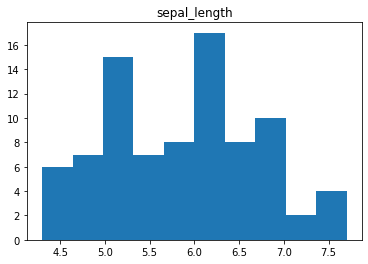

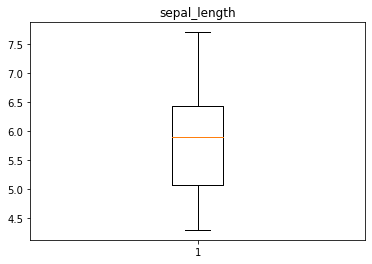

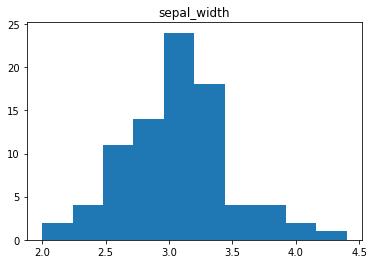

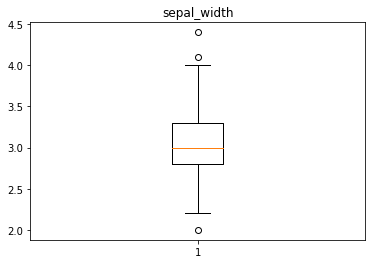

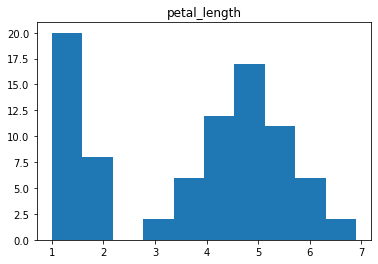

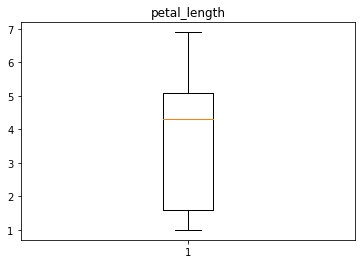

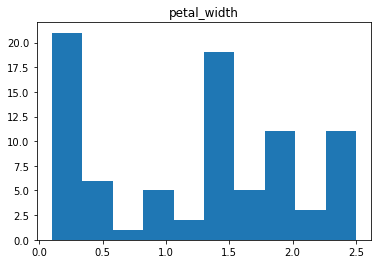

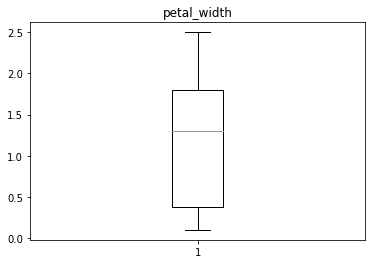

In [23]:
# Plot numeric columns
num_cols = train.columns[[train[col].dtype == 'float64' for col in train.columns]]
for col in num_cols:
    plt.hist(train[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train[col])
    plt.title(col)
    plt.show()

In [25]:
train.species_name.value_counts()

virginica     28
setosa        28
versicolor    28
Name: species_name, dtype: int64

(array([28.,  0.,  0.,  0.,  0., 28.,  0.,  0.,  0., 28.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

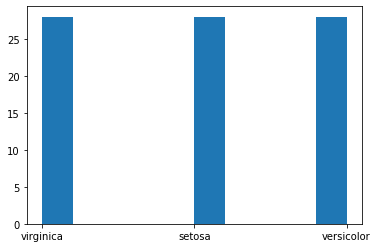

In [26]:
plt.hist(train.species_name)

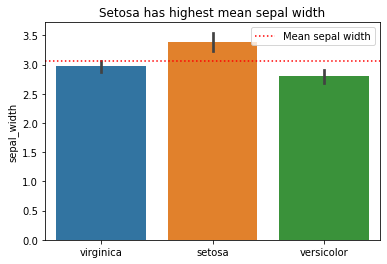

In [9]:
plt.title("Setosa has highest mean sepal width")
sns.barplot(x="species_name", y="sepal_width", data=train)
mean_sepal_width = train.sepal_width.mean()
plt.axhline(mean_sepal_width, label="Mean sepal width", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

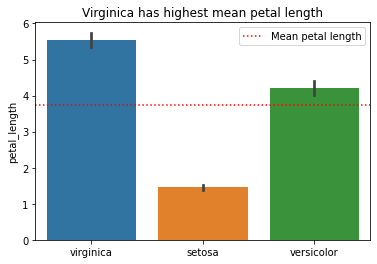

In [10]:
plt.title("Virginica has highest mean petal length")
sns.barplot(x="species_name", y="petal_length", data=train)
mean_petal_length = train.petal_length.mean()
plt.axhline(mean_petal_length, label="Mean petal length", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

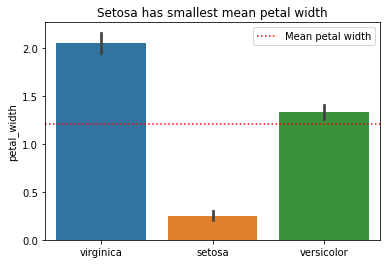

In [11]:
plt.title("Setosa has smallest mean petal width")
sns.barplot(x="species_name", y="petal_width", data=train)
mean_petal_width = train.petal_width.mean()
plt.axhline(mean_petal_width, label="Mean petal width", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

In [14]:
# Virginica descriptive statistics
virginica_describe_sl = pd.DataFrame(train[train.species_name == 'virginica'].sepal_length.describe())
virginica_describe_sw = pd.DataFrame(train[train.species_name == 'virginica'].sepal_width.describe())
virginica_describe_pl = pd.DataFrame(train[train.species_name == 'virginica'].petal_length.describe())
virginica_describe_pw = pd.DataFrame(train[train.species_name == 'virginica'].petal_width.describe())

virginica_describe = pd.concat([virginica_describe_sl, virginica_describe_sw], axis=1)
virginica_describe = pd.concat([virginica_describe, virginica_describe_pl], axis=1)
virginica_describe = pd.concat([virginica_describe, virginica_describe_pw], axis=1)
virginica_describe

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,6.650000,2.975000,5.539286,2.046429
std,0.532986,0.260519,0.525173,0.294998
min,5.800000,2.200000,4.800000,1.500000
25%,6.300000,2.800000,5.100000,1.800000
50%,6.600000,3.000000,5.550000,2.050000
75%,6.900000,3.200000,5.825000,2.300000
max,7.700000,3.400000,6.900000,2.500000


In [15]:
# Setosa descriptive statistics
setosa_describe_sl = pd.DataFrame(train[train.species_name == 'setosa'].sepal_length.describe())
setosa_describe_sw = pd.DataFrame(train[train.species_name == 'setosa'].sepal_width.describe())
setosa_describe_pl = pd.DataFrame(train[train.species_name == 'setosa'].petal_length.describe())
setosa_describe_pw = pd.DataFrame(train[train.species_name == 'setosa'].petal_width.describe())

setosa_describe = pd.concat([setosa_describe_sl, setosa_describe_sw], axis=1)
setosa_describe = pd.concat([setosa_describe, setosa_describe_pl], axis=1)
setosa_describe = pd.concat([setosa_describe, setosa_describe_pw], axis=1)
setosa_describe

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,4.957143,3.385714,1.457143,0.246429
std,0.362531,0.433516,0.185450,0.129048
min,4.300000,2.300000,1.000000,0.100000
25%,4.775000,3.100000,1.400000,0.200000
50%,5.000000,3.350000,1.500000,0.200000
75%,5.100000,3.625000,1.600000,0.325000
max,5.800000,4.400000,1.900000,0.600000


In [17]:
# Versicolor descriptive statistics
versicolor_describe_sl = pd.DataFrame(train[train.species_name == 'versicolor'].sepal_length.describe())
versicolor_describe_sw = pd.DataFrame(train[train.species_name == 'versicolor'].sepal_width.describe())
versicolor_describe_pl = pd.DataFrame(train[train.species_name == 'versicolor'].petal_length.describe())
versicolor_describe_pw = pd.DataFrame(train[train.species_name == 'versicolor'].petal_width.describe())

versicolor_describe = pd.concat([versicolor_describe_sl, versicolor_describe_sw], axis=1)
versicolor_describe = pd.concat([versicolor_describe, versicolor_describe_pl], axis=1)
versicolor_describe = pd.concat([versicolor_describe, versicolor_describe_pw], axis=1)
versicolor_describe

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,5.935714,2.800000,4.217857,1.332143
std,0.512231,0.303071,0.522142,0.205577
min,5.000000,2.000000,3.000000,1.000000
25%,5.600000,2.700000,3.900000,1.275000
50%,6.000000,2.900000,4.300000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,6.900000,3.400000,5.100000,1.700000


For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [18]:
virginica = train[train.species_name == 'virginica']
versicolor = train[train.species_name == 'versicolor']
setosa = train[train.species_name == 'setosa']

t, p = stats.mannwhitneyu(virginica.petal_width, versicolor.petal_width, alternative="greater")
t, p

(768.5, 2.982389808696449e-10)

In [19]:
test_var = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for var in test_var:
    t, p = t, p = stats.mannwhitneyu(virginica[var], versicolor[var], alternative="greater")
    print(f'Comparing {var} between virginica and versicolor')
    print(t, p)
    print('------------------')
    print('\n')

Comparing sepal_length between virginica and versicolor
652.0 1.0119920315840621e-05
------------------


Comparing sepal_width between virginica and versicolor
534.0 0.009508012794926874
------------------


Comparing petal_length between virginica and versicolor
771.5 2.5253450566492905e-10
------------------


Comparing petal_width between virginica and versicolor
768.5 2.982389808696449e-10
------------------




Takeaways

petal_length and petal_width show the most seperation between species.
Could petal and sepal area be useful features?
viginica iris have the largest petals.
setosa iris have the smallest petals.
setosa seem to have wide & short sepals.

-------------------------------------------------------------------------------------------------

Multivariate Stats

Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col

Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

Document takeaways and any actions.

In [20]:
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train['petal_length'] * train['petal_width']

In [21]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name,setosa,versicolor,virginica,sepal_area,petal_area
138,6.0,3.0,4.8,1.8,virginica,0,0,1,18.00,8.64
7,5.0,3.4,1.5,0.2,setosa,1,0,0,17.00,0.30
79,5.7,2.6,3.5,1.0,versicolor,0,1,0,14.82,3.50
74,6.4,2.9,4.3,1.3,versicolor,0,1,0,18.56,5.59
97,6.2,2.9,4.3,1.3,versicolor,0,1,0,17.98,5.59


In [22]:
combos = [
    ('sepal_length', 'sepal_width'),
    ('petal_length', 'petal_width'),
    ('sepal_area', 'petal_area'),
    ('sepal_length', 'petal_length')
]

In [23]:
combos[0]

('sepal_length', 'sepal_width')

In [25]:
train.groupby('species_name')['sepal_area'].sum()

species_name
setosa        473.12
versicolor    467.81
virginica     554.13
Name: sepal_area, dtype: float64

In [27]:
x = combos[0][0]
y = combos[0][1]
def scatter_species(x, y):
    for species, subset in train.groupby('species_name'):
        plt.scatter(subset[x], subset[y], label=species)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend()

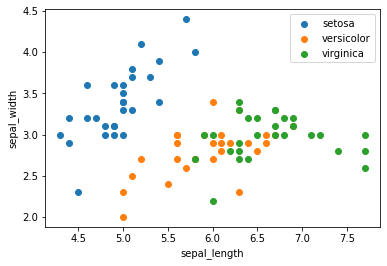

In [28]:
# test it with one plot
scatter_species(x,y)

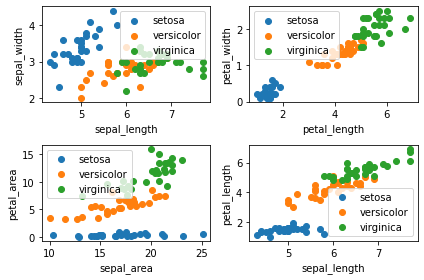

In [29]:
plt.subplot(2,2,1)
scatter_species(combos[0][0], combos[0][1])
plt.subplot(2,2,2)
scatter_species(combos[1][0], combos[1][1])
plt.subplot(2,2,3)
scatter_species(combos[2][0], combos[2][1])
plt.subplot(2,2,4)
scatter_species(combos[3][0], combos[3][1])
plt.tight_layout()

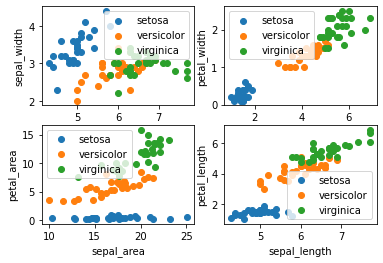

In [30]:
for i, pair in enumerate(combos):
    plt.subplot(2,2,i+1)
    scatter_species(pair[0], pair[1])

Takeaways

sepal_length is useful, sepal_width not great but likely adds some value.
petal_area is very useful, as we would expect given the previous plot of petal_width x petal length.
sepal_area is questionable, as we don't see much separation when we look at the 3rd plot in a hortizonal direction. Again, some value in sepal width, but not a ton.
A heatmap of each variable layering correlation coefficient on top.

n.b. Please do not put a heatmap with all correlation coefficients labeled as is in a presentation! A heatmap can be useful with minimal detail included. Maybe adding extreme values labeled. But not like this! This is for YOUR exploration.

In [31]:
train.corr()

,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica,sepal_area,petal_area
sepal_length,1.000000,-0.166612,0.900357,0.860775,-0.752913,0.074486,0.678427,0.685879,0.885277
sepal_width,-0.166612,1.000000,-0.415310,-0.323396,0.566281,-0.432322,-0.133959,0.599240,-0.272634
petal_length,0.900357,-0.415310,1.000000,0.965383,-0.919061,0.193310,0.725751,0.429428,0.958520
petal_width,0.860775,-0.323396,0.965383,1.000000,-0.882093,0.113537,0.768556,0.473277,0.980366
setosa,-0.752913,0.566281,-0.919061,-0.882093,1.000000,-0.500000,-0.500000,-0.205661,-0.810127
versicolor,0.074486,-0.432322,0.193310,0.113537,-0.500000,1.000000,-0.500000,-0.248940,-0.017768
virginica,0.678427,-0.133959,0.725751,0.768556,-0.500000,-0.500000,1.000000,0.454601,0.827895
sepal_area,0.685879,0.599240,0.429428,0.473277,-0.205661,-0.248940,0.454601,1.000000,0.526012
petal_area,0.885277,-0.272634,0.958520,0.980366,-0.810127,-0.017768,0.827895,0.526012,1.000000


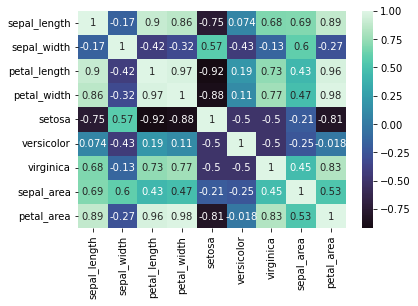

In [32]:
sns.heatmap(train.corr(), cmap='mako', center=0, annot=True)
plt.show()


Takeaways

most measures correlate with each other, the least is sepal_width with sepal_lenght @ -.15.

Negative correlations: Wider sepals => shorter & narrower petals (smaller petal areas)

Positive correlations: Longer sepals => longer & wider petals (larger petal areas)

Little to no LINEAR correlation: sepal length & sepal width.

A scatter matrix visualizing the interaction of each variable.

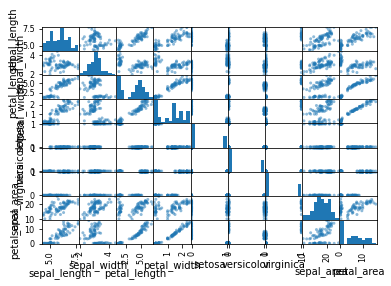

In [33]:
pd.plotting.scatter_matrix(train)
plt.show()

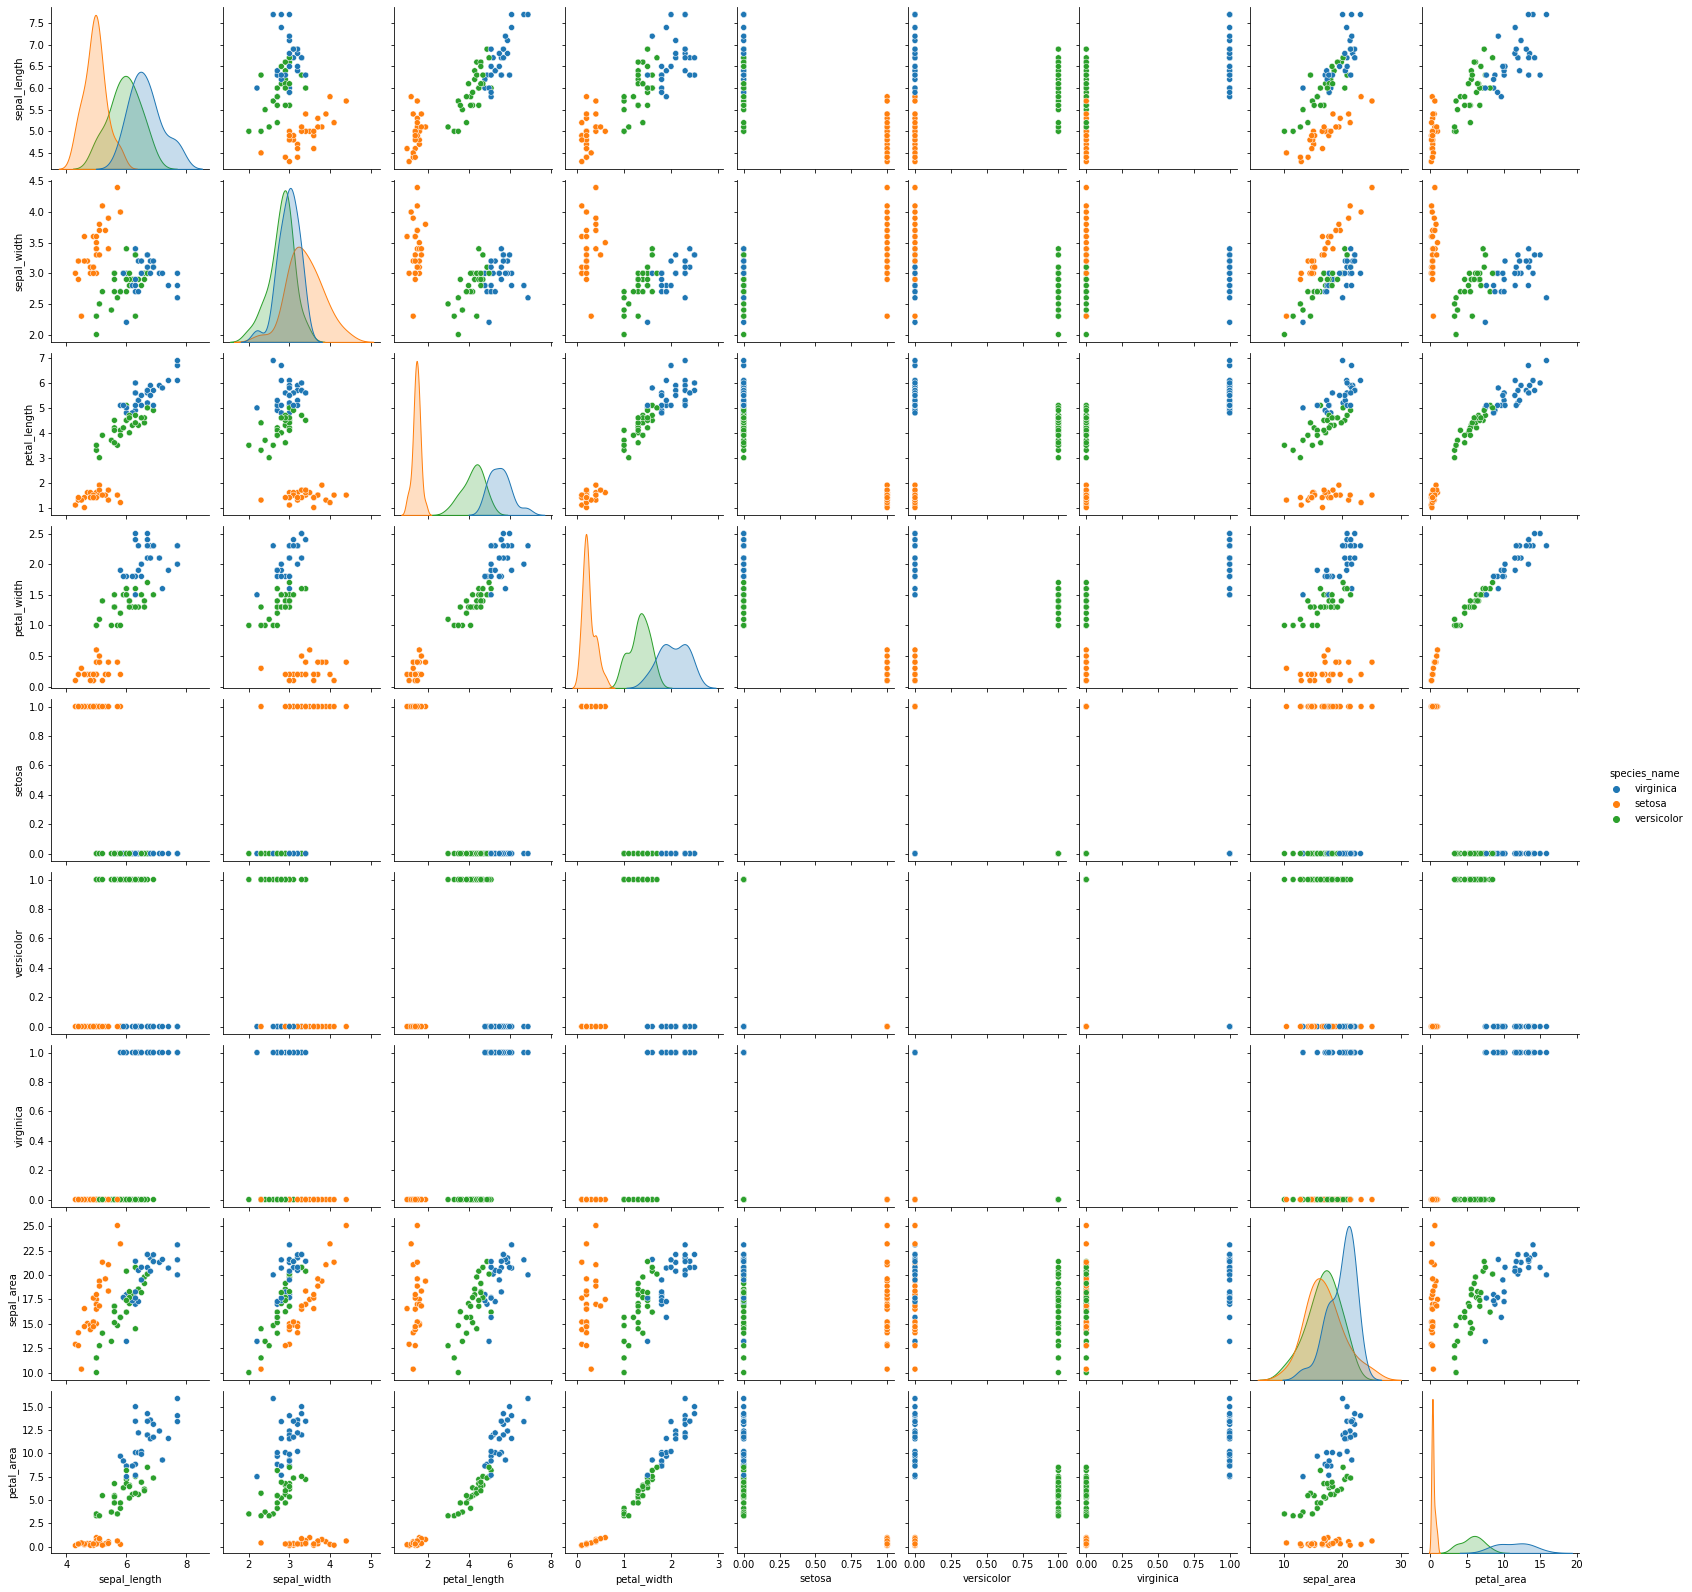

In [35]:
sns.pairplot(train, hue='species_name')
plt.show()

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 138 to 54
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  84 non-null     float64
 1   sepal_width   84 non-null     float64
 2   petal_length  84 non-null     float64
 3   petal_width   84 non-null     float64
 4   species_name  84 non-null     object 
 5   setosa        84 non-null     uint8  
 6   versicolor    84 non-null     uint8  
 7   virginica     84 non-null     uint8  
 8   sepal_area    84 non-null     float64
 9   petal_area    84 non-null     float64
dtypes: float64(6), object(1), uint8(3)
memory usage: 7.6+ KB


Takeaways

petal length + petal width show the most seperation between species.
setosa has the shortest and narrowest petals. It will be the easiest to determine.
petal area seems to show the largest separation between virginica & versicolor of all the individual features.
virginica shows slightly longer sepals, but whether that difference is significant, it's hard to say.
virginica and versicolor show little to no difference when it comes to the width of the sepals.
Hypothesis

alpha = .05

H0 - Sepal length is the same in virginica and versicolor.
Ha - Sepal length significantly different in virginica and versicolor.

In [37]:
virginica = train[train['species_name'] == 'virginica']
versicolor = train[train['species_name'] == 'versicolor']

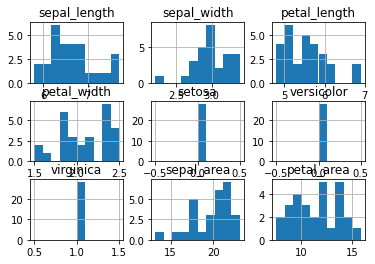

In [38]:
virginica.hist()
plt.show()

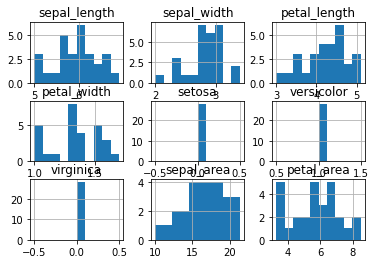

In [39]:
versicolor.hist()
plt.show()

In [40]:
virginica.describe()['sepal_length']['std']

0.532985998009398

In [41]:
versicolor.describe()['sepal_length']

count    28.000000
mean      5.935714
std       0.512231
min       5.000000
25%       5.600000
50%       6.000000
75%       6.300000
max       6.900000
Name: sepal_length, dtype: float64

In [42]:
tstat, p = stats.ttest_ind(virginica.sepal_length,
                versicolor.sepal_length, 
                equal_var=False
               )

In [43]:
tstat, p

(5.11297615624047, 4.3042670668773595e-06)

Conclusion: We reject H0

Takeaway: Sepal length will be a useful feature

What about sepal_width? Let's use the Mann-Whitney test for demo purposes.

In [44]:
stats.mannwhitneyu(virginica.sepal_width, 
                   versicolor.sepal_width
                  )

MannwhitneyuResult(statistic=534.0, pvalue=0.019016025589853748)

Conclusion: We reject H0, that sepal width is the same

Takeaway: Sepal width is still a useful indicator, but not the strongest

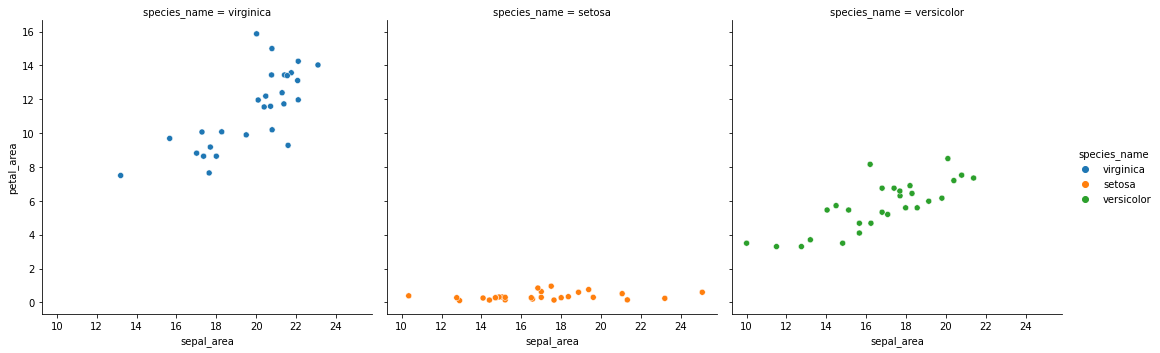

In [47]:
sns.relplot(data=train, x='sepal_area', y='petal_area', kind='scatter', hue='species_name', col='species_name')

In [ ]:
#Exercises Part III
# Explore your telco data to discover drivers of churn
# Determine if certain columns should be dropped
# Determine if it would be valuable to bin some numeric columns
# Determine if it would be valuable to combine multiple columns into one.
# What are your drivers of churn?
# Does it make sense to combine any features?
# Do you find any surprises?
# Document any and all findings and takeaways in your notebook using markdown.

In [52]:
from acquire import get_telco_data
from prepare import prep_telco_data

In [4]:
get_telco_data()

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,1,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,2,1,2,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,2,1,2,9987-LUTYD,Female,0,No,No,13,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,7040,2,1,1,9992-UJOEL,Male,0,No,No,2,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


In [53]:
telco = prep_telco_data()
telco.head()


,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,1,0,0,1,0,0,0,0,0,1
1,Male,0,No,No,9,Yes,Yes,No,No,No,...,0,0,1,0,0,0,0,0,0,1
2,Male,0,No,No,4,Yes,No,No,No,Yes,...,0,0,0,0,0,1,0,0,1,0
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,...,1,0,1,0,0,1,0,0,1,0
4,Female,1,Yes,No,3,Yes,No,No,No,No,...,1,0,0,0,0,1,0,0,0,1


In [54]:
from prepare import split

In [55]:
split(telco, stratify_by='churn_encoded')

(      gender  senior_citizen partner dependents  tenure phone_service  \
 5919  Female               0      No         No      58           Yes   
 1915    Male               0      No        Yes      71           Yes   
 5054  Female               0     Yes        Yes      35           Yes   
 2355    Male               0     Yes        Yes       1           Yes   
 6279    Male               1      No         No      20           Yes   
 ...      ...             ...     ...        ...     ...           ...   
 394   Female               0      No         No      24           Yes   
 3763  Female               0     Yes        Yes      10           Yes   
 3444  Female               0     Yes        Yes      22           Yes   
 1002    Male               0      No        Yes      22           Yes   
 4192    Male               0      No         No       2           Yes   
 
      multiple_lines      online_security        online_backup  \
 5919            Yes                  Yes   